In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn

matplotlib.rcParams.update({'font.size': 12})
colors = [matplotlib.colors.to_rgb(c) for c in matplotlib.pyplot.rcParams['axes.prop_cycle'].by_key()['color']]
print(colors[0][0])

0.12156862745098039


In [20]:
df = pd.read_csv("Psymp50_Pisol100_PCRmax83.csv")
df_alt = pd.read_csv("Psymp50_Pisol100_PCRmax83_AoNcomply.csv")

Plot case with no conf PCR and varying adherence

In [21]:
Scenarios = np.sort(np.unique(df["Scenario"]))
Scenarios_alt_names = np.array(["No testing", "2 LFDs + 1 PCR", "2 LFDs + 14-day conc. PCR", \
                       "2 LFDs + 14-day rand. PCR", "3 LFDs only", "2 LFDs only", \
                        "Daily LFDs only", "Daily LFDs + 1 PCR", "3 LFDs + 1 PCR"])
iorder = np.array([6,8])

Do adherence loop

In [24]:
df_adherence = df.loc[df["MeanTaT"]==45.0]
print(len(df_adherence))
Confs = np.sort(np.unique(df_adherence["ConfPCR"]))
Adhs = np.sort(np.unique(df_adherence["Adherence"]))
print(Confs)
print(Adhs)

MeanPIs = np.zeros((len(Scenarios),len(Confs),len(Adhs)))
SEPIs = np.zeros((len(Scenarios),len(Confs),len(Adhs)))
RPI = np.zeros((len(Scenarios),len(Confs),len(Adhs)))
for (i,s) in enumerate(Scenarios):
    dfi = df_adherence.loc[df_adherence["Scenario"]==s]
    for (j,c) in enumerate(Confs):
        dfij = dfi.loc[dfi["ConfPCR"]==c]
        for (k,a) in enumerate(Adhs):
            dfijk = dfij.loc[dfij["Adherence"]==a]
            MeanPIs[i,j,k] = np.mean(dfijk["InfPot"])
            SEPIs[i,j,k] = np.std(dfijk["InfPot"])/np.sqrt(len(dfijk["InfPot"]))
            RPI[i,j,k] = 1 - MeanPIs[i,j,k]/MeanPIs[0,j,k]
SERPI = SEPIs/MeanPIs

df_TaT = df.loc[df["MeanTaT"] != 45.0]
Confs = np.sort(np.unique(df_TaT["ConfPCR"]))
TaTs = np.sort(np.unique(df_TaT["MeanTaT"]))
print(Confs)
print(TaTs)

MeanPIs_TaT = np.zeros((len(Scenarios),len(Confs),len(TaTs)))
SEPIs_TaT = np.zeros((len(Scenarios),len(Confs),len(TaTs)))
RPI_TaT = np.zeros((len(Scenarios),len(Confs),len(TaTs)))
for (i,s) in enumerate(Scenarios):
    dfi = df_TaT.loc[df_TaT["Scenario"]==s]
    for (j,c) in enumerate(Confs):
        dfij = dfi.loc[dfi["ConfPCR"]==c]
        for (k,t) in enumerate(TaTs):
            dfijk = dfij.loc[dfij["MeanTaT"]==t]
            MeanPIs_TaT[i,j,k] = np.mean(dfijk["InfPot"])
            SEPIs_TaT[i,j,k] = np.std(dfijk["InfPot"])/np.sqrt(len(dfijk["InfPot"]))
            RPI_TaT[i,j,k] = 1 - MeanPIs_TaT[i,j,k]/MeanPIs_TaT[0,j,k]
SERPI_TaT = SEPIs_TaT/MeanPIs_TaT

df_alt_adherence = df_alt.loc[df_alt["MeanTaT"]==45.0]

print(len(df_alt_adherence))
Confs_alt = np.sort(np.unique(df_alt_adherence["ConfPCR"]))
Adhs_alt = np.sort(np.unique(df_alt_adherence["Adherence"]))
print(Confs)
print(Adhs)

MeanPIs_alt = np.zeros((len(Scenarios),len(Confs),len(Adhs)))
SEPIs_alt = np.zeros((len(Scenarios),len(Confs),len(Adhs)))
RPI_alt = np.zeros((len(Scenarios),len(Confs),len(Adhs)))
for (i,s) in enumerate(Scenarios):
    dfi = df_alt_adherence.loc[df_alt_adherence["Scenario"]==s]
    for (j,c) in enumerate(Confs):
        dfij = dfi.loc[dfi["ConfPCR"]==c]
        for (k,a) in enumerate(Adhs):
            dfijk = dfij.loc[dfij["Adherence"]==a]
            MeanPIs_alt[i,j,k] = np.mean(dfijk["InfPot"])
            SEPIs_alt[i,j,k] = np.std(dfijk["InfPot"])/np.sqrt(len(dfijk["InfPot"]))
            RPI_alt[i,j,k] = 1 - MeanPIs_alt[i,j,k]/MeanPIs_alt[0,j,k]
SERPI_alt = SEPIs_alt/MeanPIs_alt

df_TaT_alt = df_alt.loc[df_alt["MeanTaT"] != 45.0]
Confs_alt = np.sort(np.unique(df_TaT_alt["ConfPCR"]))
TaTs_alt = np.sort(np.unique(df_TaT_alt["MeanTaT"]))
print(Confs_alt)
print(TaTs_alt)

MeanPIs_TaT_alt = np.zeros((len(Scenarios),len(Confs_alt),len(TaTs_alt)))
SEPIs_TaT_alt = np.zeros((len(Scenarios),len(Confs_alt),len(TaTs_alt)))
RPI_TaT_alt = np.zeros((len(Scenarios),len(Confs_alt),len(TaTs_alt)))
for (i,s) in enumerate(Scenarios):
    dfi = df_TaT_alt.loc[df_TaT_alt["Scenario"]==s]
    for (j,c) in enumerate(Confs_alt):
        dfij = dfi.loc[dfi["ConfPCR"]==c]
        for (k,t) in enumerate(TaTs_alt):
            dfijk = dfij.loc[dfij["MeanTaT"]==t]
            MeanPIs_TaT_alt[i,j,k] = np.mean(dfijk["InfPot"])
            SEPIs_TaT_alt[i,j,k] = np.std(dfijk["InfPot"])/np.sqrt(len(dfijk["InfPot"]))
            RPI_TaT_alt[i,j,k] = 1 - MeanPIs_TaT_alt[i,j,k]/MeanPIs_TaT_alt[0,j,k]
SERPI_TaT_alt = SEPIs_TaT_alt/MeanPIs_TaT_alt

18000000
[False  True]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[False  True]
[24. 36. 48. 60. 72.]
18000000
[False  True]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[False  True]
[24. 36. 48. 60. 72.]


In [22]:
# fig, ax = plt.subplots(1,1,figsize=(5,5.8))
# j = 0  #no Conf PCR

# c0 = []
# for a in Adhs:
#     c0.append((1-a)*np.array(colors[0]) + (a)*np.ones(3))

# for k in [7,6,5,4,3,2]:
#     a = Adhs[k]
#     lab = "%d"%np.round(100*a) + '%'
#     ax.errorbar(Scenarios_alt_names[iorder],100*RPI[iorder,j,k],100*SERPI[iorder,j,k],\
#                 fmt='-o',c=c0[k],label=lab)

# ax.set_ylim(0,100)
# ax.set_ylabel("Relative % total RPI")
# ax.set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
# ax.legend(title='LFD adherence',ncol = 2)
# fig.tight_layout()
# fig.savefig("scenario_stoch_adh_scatter.png")

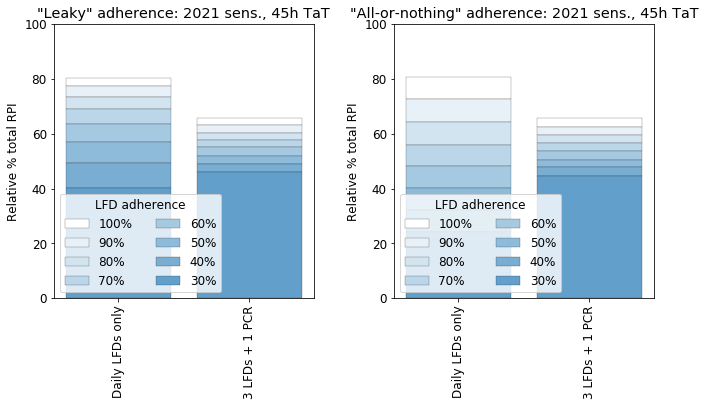

In [27]:
fig, ax = plt.subplots(1,2,figsize=(10,5.8))
j = 0  #no Conf PCR

kvals = [9,8,7,6,5,4,3,2]
iorder = np.array([6,8])
for (nk, k) in enumerate(kvals):
    a = Adhs[k]
    lab = "%d"%np.round(100*a) + '%'    
    if nk < len(kvals)-1:
        ax[0].bar(Scenarios_alt_names[iorder],\
               100*(RPI[iorder,j,k] - RPI[iorder,j,kvals[nk+1]]),\
               bottom=100*RPI[iorder,j,kvals[nk+1]], color=c0[k],\
               label=lab, linewidth=0.2, edgecolor='k')
    else:
        ax[0].bar(Scenarios_alt_names[iorder],\
               100*RPI[iorder,j,k], color=c0[k],\
               label=lab, linewidth=0.2, edgecolor='k')


for (nk, k) in enumerate(kvals):
    a = Adhs[k]
    lab = "%d"%np.round(100*a) + '%'    
    if nk < len(kvals)-1:
        ax[1].bar(Scenarios_alt_names[iorder],\
               100*(RPI_alt[iorder,j,k] - RPI_alt[iorder,j,kvals[nk+1]]),\
               bottom=100*RPI_alt[iorder,j,kvals[nk+1]], color=c0[k],\
               label=lab, linewidth=0.2, edgecolor='k')
    else:
        ax[1].bar(Scenarios_alt_names[iorder],\
               100*RPI_alt[iorder,j,k], color=c0[k],\
               label=lab, linewidth=0.2, edgecolor='k')

ax[0].set_title("\"Leaky\" adherence: 2021 sens., 45h TaT")
ax[1].set_title("\"All-or-nothing\" adherence: 2021 sens., 45h TaT")

for i in [0,1]:
    ax[i].set_ylim(0,100)
    ax[i].set_ylabel("Relative % total RPI")
    ax[i].set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
    ax[i].legend(title='LFD adherence',ncol=2)


fig.tight_layout()
fig.savefig("scenario_stoch_adh_bar.png")

Output DataFrames

In [152]:
Ah = np.reshape(Adhs,(1,len(Adhs)))
headers = "Adherence"
for sc in Scenarios_alt_names:
    headers = "%s, %s"%(headers,sc)

out_arr = np.transpose(np.concatenate((Ah,MeanPIs[:,0,:]),axis=0))
np.savetxt("no_confPCR_adherence.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Ah,SEPIs[:,0,:]),axis=0))
np.savetxt("no_confPCR_adherence_stderr.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Ah,MeanPIs[:,1,:]),axis=0))
np.savetxt("confPCR_adherence.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Ah,SEPIs[:,1,:]),axis=0))
np.savetxt("confPCR_adherence_stderr.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

Do TaT loop

In [26]:
# fig, ax = plt.subplots(1,1,figsize=(5,5.8))
# j = 0  #no Conf PCR

# alph = TaTs/(np.max(TaTs) + 0.5*np.min(TaTs))
# c1 = []
# print(colors[1])
# for (k,t) in enumerate(TaTs):
#     lab = "%d"%t + 'h'
#     c1.append(alph[k]*np.array(colors[1]) + (1-alph[k])*np.ones(3))
#     ax.errorbar(Scenarios_alt_names[iorder],100*RPI_TaT[iorder,j,k],\
#             100*SERPI_TaT[iorder,j,k], fmt='-o', c=c1[k],label=lab)

# ax.set_ylim(0,100)
# ax.set_ylabel("Relative % total RPI")
# ax.set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
# ax.legend(title='PCR TaT',ncol = 2)
# fig.tight_layout()
# fig.savefig("scenario_stoch_tat_scatter.png")

Calculate mean effects

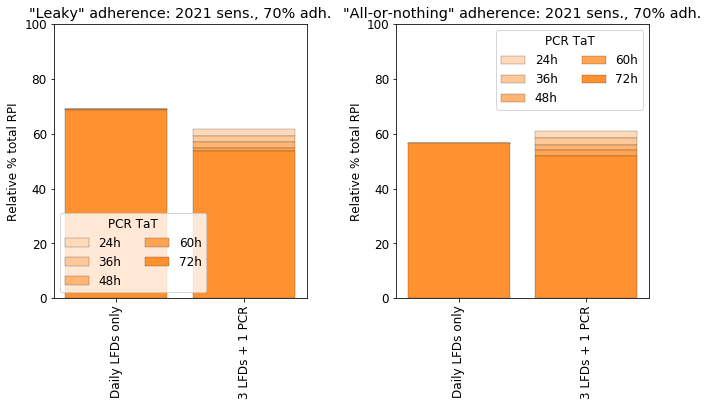

In [28]:
fig, ax = plt.subplots(1,2,figsize=(10,5.8))
j = 0  #no Conf PCR


iorder = np.array([6,8])
for (k,t) in enumerate(TaTs):
    lab = "%d"%t + 'h'
    if k < len(TaTs)-1:
        ax[0].bar(Scenarios_alt_names[iorder],\
               100*(RPI_TaT[iorder,j,k] - RPI_TaT[iorder,j,k+1]),\
               bottom=100*RPI_TaT[iorder,j,k+1], color=c1[k],\
               label=lab,linewidth=0.2, edgecolor='k')
    else:
        ax[0].bar(Scenarios_alt_names[iorder],\
               100*RPI_TaT[iorder,j,k], color=c1[k],\
               label=lab,linewidth=0.2, edgecolor='k')
        
      
for (k,t) in enumerate(TaTs_alt):
    lab = "%d"%t + 'h'
    if k < len(TaTs_alt)-1:
        ax[1].bar(Scenarios_alt_names[iorder],\
               100*(RPI_TaT_alt[iorder,j,k] - RPI_TaT_alt[iorder,j,k+1]),\
               bottom=100*RPI_TaT_alt[iorder,j,k+1], color=c1[k],\
               label=lab,linewidth=0.2, edgecolor='k')
    else:
        ax[1].bar(Scenarios_alt_names[iorder],\
               100*RPI_TaT_alt[iorder,j,k], color=c1[k],\
               label=lab,linewidth=0.2, edgecolor='k')

ax[0].set_title("\"Leaky\" adherence: 2021 sens., 70% adh.")
ax[1].set_title("\"All-or-nothing\" adherence: 2021 sens., 70% adh.")

for i in [0,1]:
    ax[i].set_ylim(0,100)
    ax[i].set_ylabel("Relative % total RPI")
    ax[i].set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
    ax[i].legend(title='PCR TaT',ncol=2)
fig.tight_layout()
fig.savefig("scenario_stoch_tat_bar.png")

In [141]:
Th = np.reshape(TaTs,(1,len(TaTs)))
headers = "PCR TaT (h)"
for sc in Scenarios_alt_names:
    headers = "%s, %s"%(headers,sc)


out_arr = np.transpose(np.concatenate((Th,MeanPIs_TaT[:,0,:]),axis=0))
np.savetxt("no_confPCR_TaT.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Th,SEPIs_TaT[:,0,:]),axis=0))
np.savetxt("no_confPCR_TaT_stderr.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Th,MeanPIs_TaT[:,1,:]),axis=0))
np.savetxt("confPCR_TaT.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Th,SEPIs_TaT[:,1,:]),axis=0))
np.savetxt("confPCR_TaT_stderr.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

Compare select cases with all or nothing

In [188]:
df_alt = pd.read_csv("Psymp50_Pisol100_PCRmax83_AoNcomply.csv")

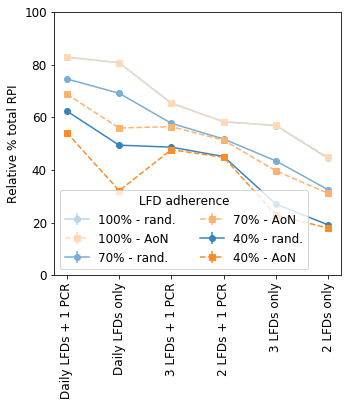

In [193]:
fig, ax = plt.subplots(1,1,figsize=(5,5.8))
j = 0  #no Conf PCR

c0 = []
c1 = []
for a in Adhs:
    c0.append((1.3 - a)*np.array(colors[0]) + (a-0.3)*np.ones(3))
    c1.append((1.3 - a)*np.array(colors[1]) + (a-0.3)*np.ones(3))

for k in [9,6,3]:
    a = Adhs[k]
    lab = "%d"%np.round(100*a) + '% - rand.'
    ax.errorbar(Scenarios_alt_names[iorder],100*RPI[iorder,j,k],100*SERPI[iorder,j,k],\
                fmt='-o',c=c0[k],label=lab)
    lab = "%d"%np.round(100*a) + '% - AoN'
    ax.errorbar(Scenarios_alt_names[iorder],100*RPI_alt[iorder,j,k],100*SERPI_alt[iorder,j,k],\
                fmt='--s',c=c1[k],label=lab)

ax.set_ylim(0,100)
ax.set_ylabel("Relative % total RPI")
ax.set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
ax.legend(title='LFD adherence',ncol = 2)
fig.tight_layout()
fig.savefig("rand_vs_aon_adherence.png")

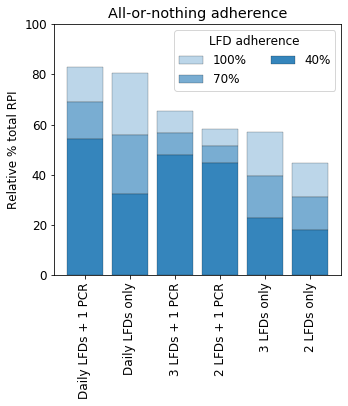

In [227]:
fig, ax = plt.subplots(1,1,figsize=(5,5.8))
j = 0  #no Conf PCR


c0 = []
for a in Adhs:
    c0.append((1 - a)*np.array(colors[0]) + (a)*np.ones(3))
kvals = [9,6,3]
for (nk, k) in enumerate(kvals):
    a = Adhs[k]
    lab = "%d"%np.round(100*a) + '%'    
    if nk < len(kvals)-1:
        ax.bar(Scenarios_alt_names[iorder],\
               100*(RPI_alt[iorder,j,k] - RPI_alt[iorder,j,kvals[nk+1]]),\
               bottom=100*RPI_alt[iorder,j,kvals[nk+1]], color=c0[k-3],\
               label=lab, linewidth=0.2, edgecolor='k')
    else:
        ax.bar(Scenarios_alt_names[iorder],\
               100*RPI_alt[iorder,j,k], color=c0[k-3],\
               label=lab, linewidth=0.2, edgecolor='k')

ax.set_ylim(0,100)
ax.set_ylabel("Relative % total RPI")
ax.set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
ax.legend(title='LFD adherence',ncol=2)
ax.set_title("All-or-nothing adherence")
fig.tight_layout()
fig.savefig("scenario_stoch_adh_bar_AoN.png")

(1.0, 0.4980392156862745, 0.054901960784313725)


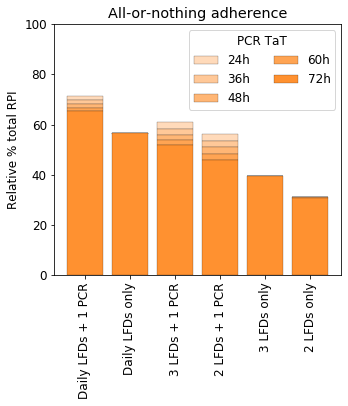

In [211]:
fig, ax = plt.subplots(1,1,figsize=(5,5.8))
j = 0  #no Conf PCR

c1 = []
print(colors[1])
for (k,t) in enumerate(TaTs_alt):
    c1.append(alph[k]*np.array(colors[1]) + (1-alph[k])*np.ones(3))
for (k,t) in enumerate(TaTs_alt):
    lab = "%d"%t + 'h'
    if k < len(TaTs_alt)-1:
        ax.bar(Scenarios_alt_names[iorder],\
               100*(RPI_TaT_alt[iorder,j,k] - RPI_TaT_alt[iorder,j,k+1]),\
               bottom=100*RPI_TaT_alt[iorder,j,k+1], color=c1[k],\
               label=lab,linewidth=0.2, edgecolor='k')
    else:
        ax.bar(Scenarios_alt_names[iorder],\
               100*RPI_TaT_alt[iorder,j,k], color=c1[k],\
               label=lab,linewidth=0.2, edgecolor='k')

ax.set_ylim(0,100)
ax.set_ylabel("Relative % total RPI")
ax.set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
ax.set_title("All-or-nothing adherence")
ax.legend(title='PCR TaT',ncol=2)
fig.tight_layout()
fig.savefig("scenario_stoch_tat_bar_AoN.png")

In [212]:
Th = np.reshape(TaTs_alt,(1,len(TaTs_alt)))
headers = "PCR TaT (h)"
for sc in Scenarios_alt_names:
    headers = "%s, %s"%(headers,sc)


out_arr = np.transpose(np.concatenate((Th,MeanPIs_TaT_alt[:,0,:]),axis=0))
np.savetxt("no_confPCR_TaT_AllorNothingAdh.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Th,SEPIs_TaT_alt[:,0,:]),axis=0))
np.savetxt("no_confPCR_TaT_stderr_AllorNothingAdh.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Th,MeanPIs_TaT_alt[:,1,:]),axis=0))
np.savetxt("confPCR_TaT_AllorNothingAdh.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Th,SEPIs_TaT_alt[:,1,:]),axis=0))
np.savetxt("confPCR_TaT_stderr_AllorNothingAdh.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

In [213]:
Ah = np.reshape(Adhs_alt,(1,len(Adhs_alt)))
headers = "Adherence"
for sc in Scenarios_alt_names:
    headers = "%s, %s"%(headers,sc)

out_arr = np.transpose(np.concatenate((Ah,MeanPIs_alt[:,0,:]),axis=0))
np.savetxt("no_confPCR_adherence_AllorNothingAdh.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Ah,SEPIs_alt[:,0,:]),axis=0))
np.savetxt("no_confPCR_adherence_stderr_AllorNothingAdh.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Ah,MeanPIs_alt[:,1,:]),axis=0))
np.savetxt("confPCR_adherence_AllorNothingAdh.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

out_arr = np.transpose(np.concatenate((Ah,SEPIs_alt[:,1,:]),axis=0))
np.savetxt("confPCR_adherence_stderr_AllorNothingAdh.csv",out_arr,delimiter=",",header=headers, fmt="%.5f")

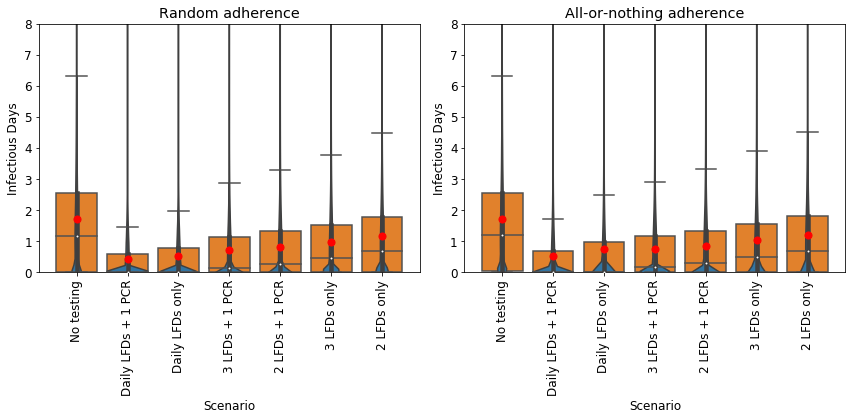

In [237]:

df_adherencep7 = df_adherence.loc[df_adherence["Adherence"]==0.7]
df_adherence_altp7 = df_alt_adherence.loc[df_alt_adherence["Adherence"]==0.7]

fig, ax = plt.subplots(1,2,figsize=(12,6))
Mean_RPIsh = np.zeros(len(Scenarios))
Mean_RPIsh_alt = np.zeros(len(Scenarios))
for (i,s) in enumerate(Scenarios):
    Mean_RPIsh[i] = np.mean(df_adherencep7.loc[(df_adherencep7["Scenario"]==s),"InfPot"])
    Mean_RPIsh_alt[i] = np.mean(df_adherence_altp7.loc[(df_adherence_altp7["Scenario"]==s),"InfPot"])
iorder = np.array([0,7,6,8,1,4,5])

sn.boxplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
              data=df_adherencep7, ax=ax[0], fliersize=0, color ='C1', zorder=1)
sn.violinplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
              data=df_adherencep7, ax=ax[0], color='C0', zorder=5)
ax[0].scatter(Scenarios_alt_names[iorder],Mean_RPIsh[iorder],s=50,c='r',zorder=10)
ax[0].set_title("Random adherence")
sn.boxplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
              data=df_adherence_altp7, ax=ax[1], fliersize=0, color ='C1', zorder=1)
sn.violinplot(x="Scenario",y="InfPot",order=Scenarios[iorder], \
              data=df_adherence_altp7, ax=ax[1], color='C0', zorder=5)
ax[1].scatter(Scenarios_alt_names[iorder],Mean_RPIsh_alt[iorder],s=50,c='r',zorder=10)
ax[1].set_title("All-or-nothing adherence")

for i in [0,1]:
    ax[i].set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
    ax[i].set_ylim(0,8)
    ax[i].set_ylabel("Infectious Days")
fig.tight_layout()
fig.savefig("stoch_with_conf_updated.png")

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5.8))
j = 0  #no Conf PCR

kvals = [9,8,7,6,5,4,3,2]
iorder = np.array([7,6,8])
for (nk, k) in enumerate(kvals):
    a = Adhs[k]
    lab = "%d"%np.round(100*a) + '%'    
    if nk < len(kvals)-1:
        ax.bar(Scenarios_alt_names[iorder],\
               100*(RPI[iorder,j,k] - RPI[iorder,j,kvals[nk+1]]),\
               bottom=100*RPI[iorder,j,kvals[nk+1]], color=c0[k-3],\
               label=lab, linewidth=0.2, edgecolor='k')
    else:
        ax.bar(Scenarios_alt_names[iorder],\
               100*RPI[iorder,j,k], color=c0[k-3],\
               label=lab, linewidth=0.2, edgecolor='k')

ax.set_ylim(0,100)
ax.set_ylabel("Relative % total RPI")
ax.set_xticklabels(labels=Scenarios_alt_names[iorder],rotation=90)
ax.legend(title='LFD adherence',ncol=2)
ax.set_title("Random adherence")
fig.tight_layout()
fig.savefig("scenario_stoch_adh_bar.png")